### Step 1: Define the Problem

- Objective: Predict diabetes and understand its influencing factors.

- Stakeholder: Gen Test's Diabetic360 subscription service.

### Problem Split:

- At-risk individuals for prevention.

- Diabetes patients for management and care.

# step 2
- import lib 


In [1]:
#data manipulation and handling 

import pandas as pd 
import numpy as np

#data visualization 

import matplotlib.pyplot as plt
import seaborn as sns

#statitical analyst

import statsmodels.api
import scipy as sc

#preprocessing of data 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,accuracy_score,f1_score
from imblearn.over_sampling import SMOTE

#model building 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier


# SAVE THE MODEL FOR FUTHER USE 
import joblib

#miscellaneous 

import warnings 
warnings.filterwarnings("ignore")  # to ignore warning 

# step 3 
- import data and explore the data 

In [2]:
#path of the file to load
path="diabetes_binary_health_indicators_BRFSS2015 (1).csv"

# load the dataset

df= pd.read_csv(path)

#check the dataset structure 

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   patientid             253680 non-null  object
 1   Diabetes_binary       253680 non-null  int64 
 2   HighBP                253680 non-null  int64 
 3   HighChol              253680 non-null  int64 
 4   CholCheck             253680 non-null  int64 
 5   BMI                   253680 non-null  int64 
 6   Smoker                253680 non-null  int64 
 7   Stroke                253680 non-null  int64 
 8   HeartDiseaseorAttack  253680 non-null  int64 
 9   PhysActivity          253680 non-null  int64 
 10  Fruits                253680 non-null  int64 
 11  Veggies               253680 non-null  int64 
 12  HvyAlcoholConsump     253680 non-null  int64 
 13  AnyHealthcare         253680 non-null  int64 
 14  NoDocbcCost           253680 non-null  int64 
 15  GenHlth          

### as we can see that the data has 22 colums in total and 253680 in total examples and their is no missing values in the datset and all the features are in int64 format in which 7 rows are ordinal data and 14 rows are catagorical data and our target columns is Diabetes_binary.

In [3]:
# check the datapoint of each columns 

df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### as in the above describe function is show that 13 columns are in 0 and 1 format

## Describe Features 
### BMI:

Max = 98, Min = 12, Mean = 28.38, Median = 27, StdDev = 6.6
Interpretation:
Data is fairly right-skewed (mean > median).
StdDev is high, indicating high variability.
75% of the data lies under 31, suggesting a concentration in the lower range.
Plan: Categorize into Low, Medium, and High BMI using quantiles or domain knowledge. Example:
Low: BMI ≤ 25
Medium: 25 < BMI ≤ 30
High: BMI > 30

### GenHlth (General Health)(ordinal data ):

Max = 5, Min = 1, Mean = 2.5, Median = 2, StdDev = 1.06
Interpretation:
Data is slightly right-skewed.
Most values lie under 3 (75%), suggesting the majority have average or good general health.
Plan: Categorize into health levels (e.g., Poor, Fair, Good).

### MenHlth (Mental Health Days) and PhysHlth (Physical Health Days):

Max = 30, Min = 0, Mean = ~3-4, Median = 0, StdDev = 7.4-8.7
Interpretation:
Median = 0 and Mean > Median indicate a strong right skew.
Possible outliers with extreme high values (30 days).
Plan: Cap extreme values (e.g., values >20 days) and categorize into ranges (None, Few, Many).

### Age(ordinal data ):

Max = 13, Min = 1, Mean = 8.03, Median = 8, StdDev = 3.05
Interpretation:
Data is fairly symmetric (mean ≈ median).
Plan: Map numeric age groups to descriptive categories:
1-4: Young adults
5-8: Middle-aged
9-13: Elderly

### Education and Income(ordinal data ):

Both have low StdDev relative to their range, meaning they are less dispersed.
Education:
Most people fall into higher education levels (median = 5, 75% ≤ 6).
Income:
Most people fall into higher income brackets (median = 7, 75% ≤ 8).
Plan: Use these features as-is for now but consider grouping:
Education: Low (1-3), Medium (4-5), High (6).
Income: Low (1-3), Medium (4-6), High (7-8).

In [4]:
# Define feature groups
categorical_features = [ 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                        'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                        'DiffWalk', 'Sex']
ordinal_features = ['GenHlth', 'Age', 'Education', 'Income']
continuous_features = ['BMI', 'MentHlth', 'PhysHlth']

# Data Distributions Plots

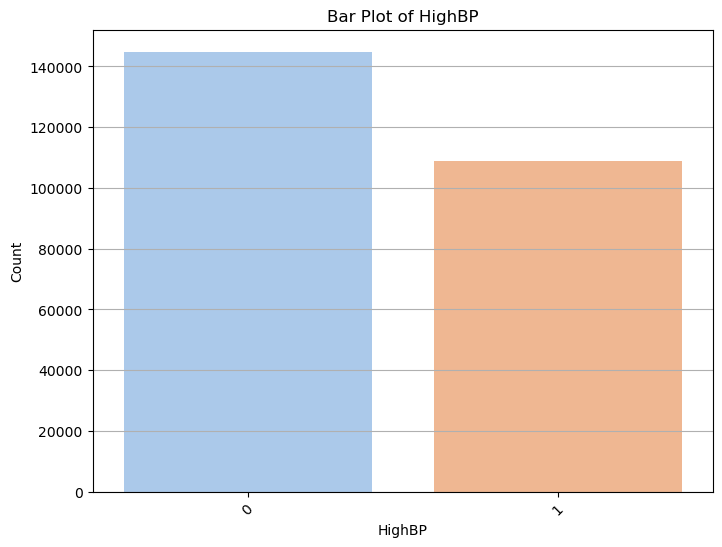

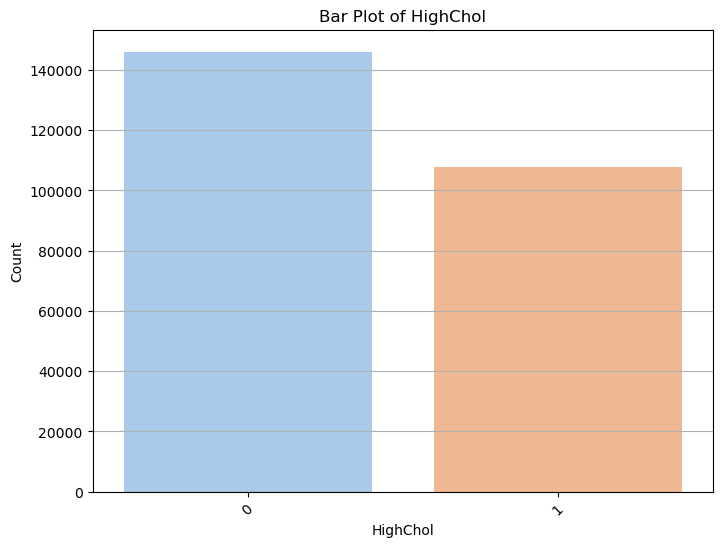

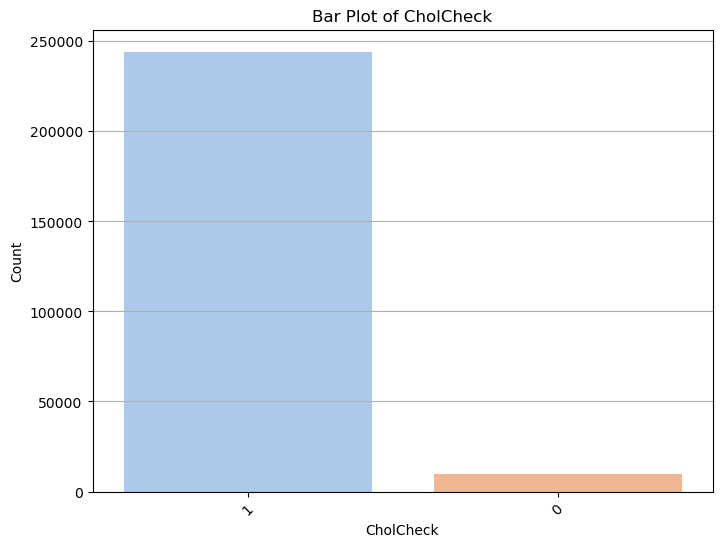

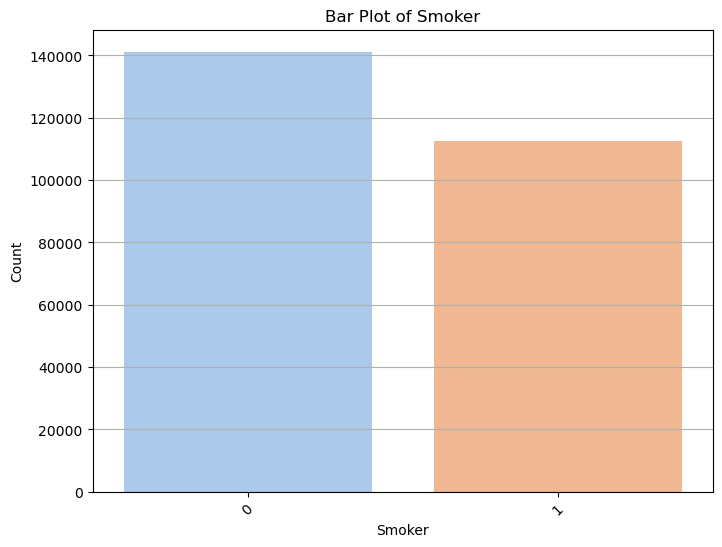

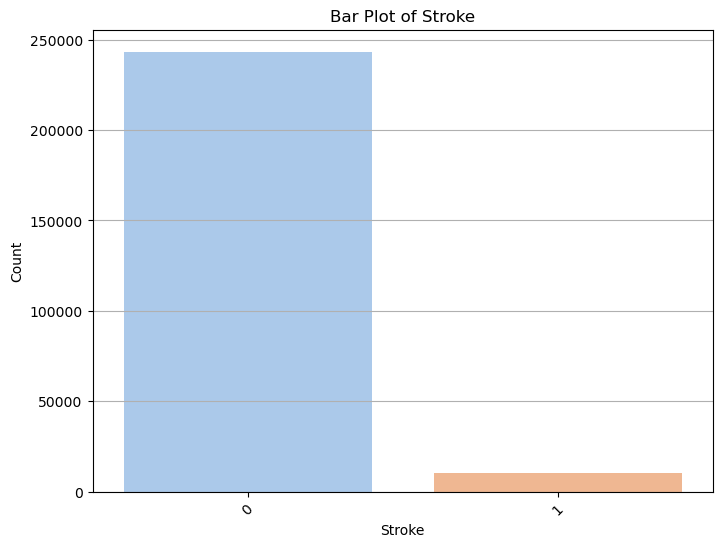

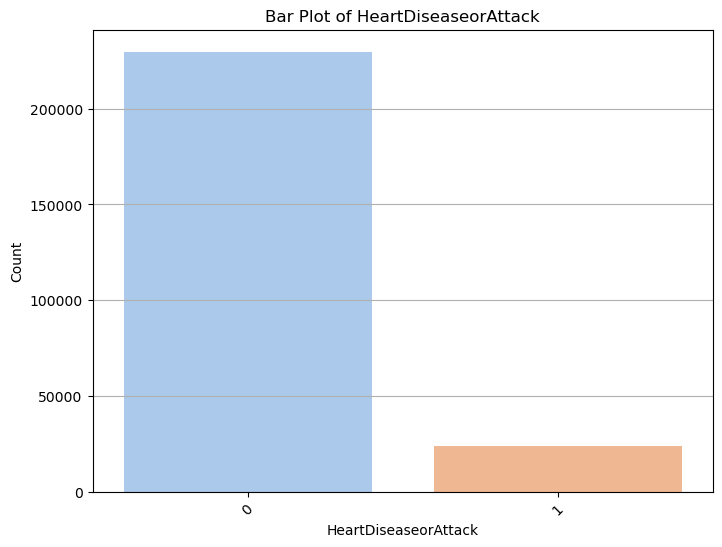

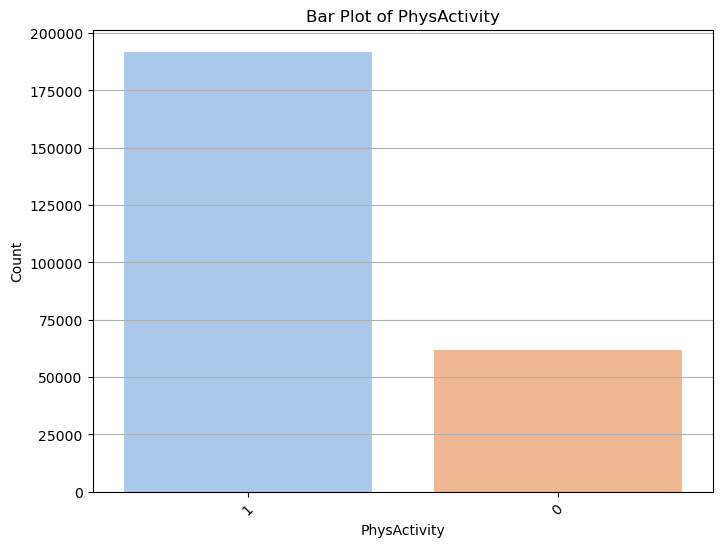

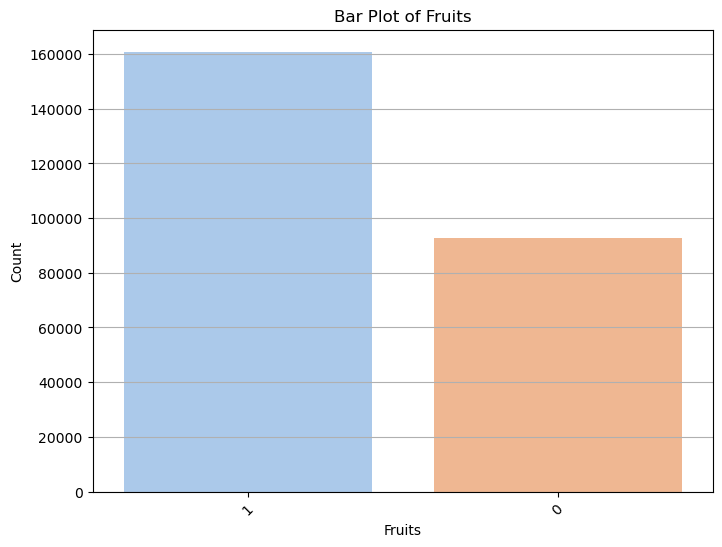

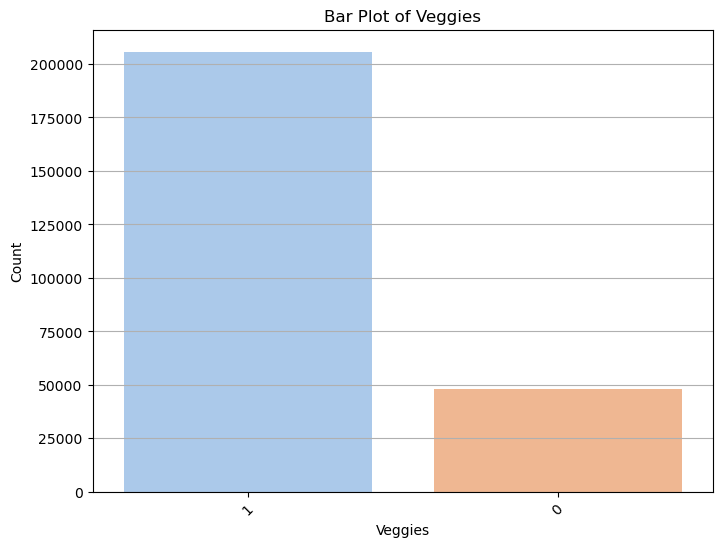

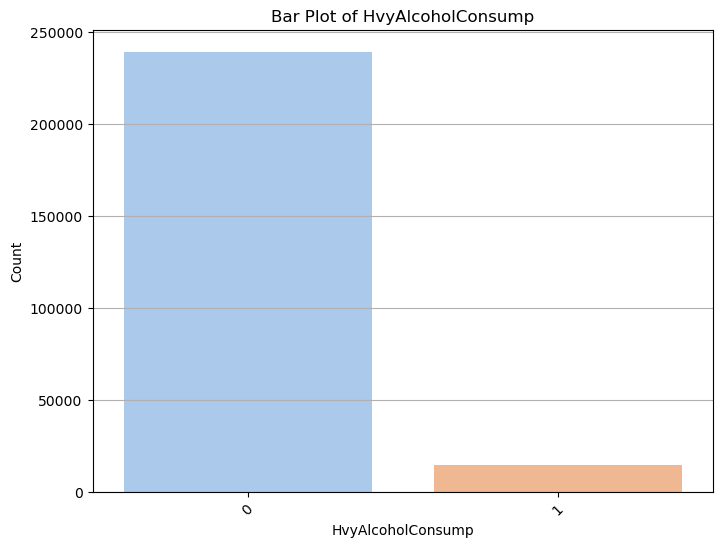

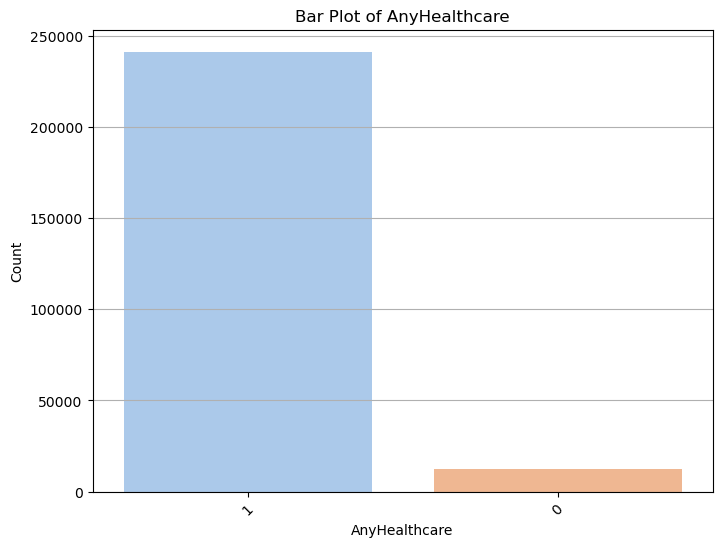

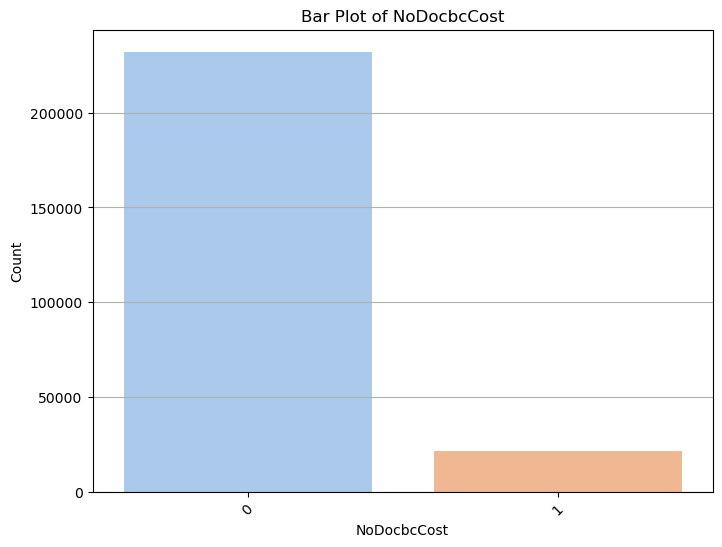

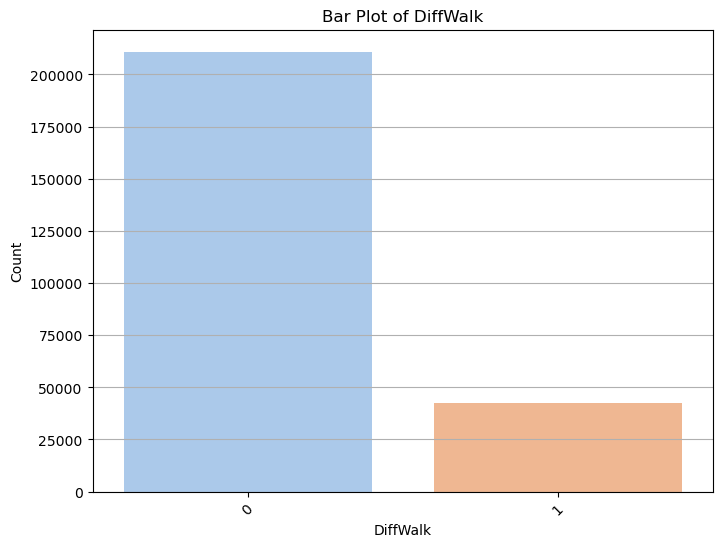

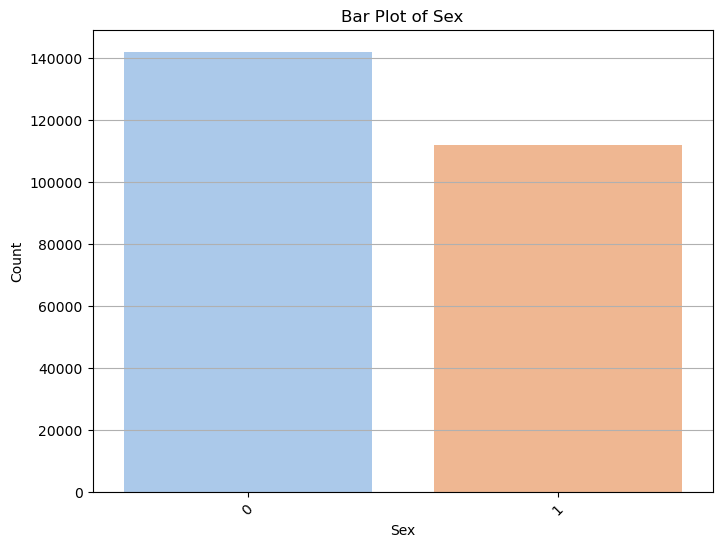

In [5]:
### distribution of catagorical feature 
categorical_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                        'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                        'DiffWalk', 'Sex']
# Plot bar plots for each categorical feature
for feature in categorical_features :
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature, palette='pastel', order=df[feature].value_counts().index)
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.show()

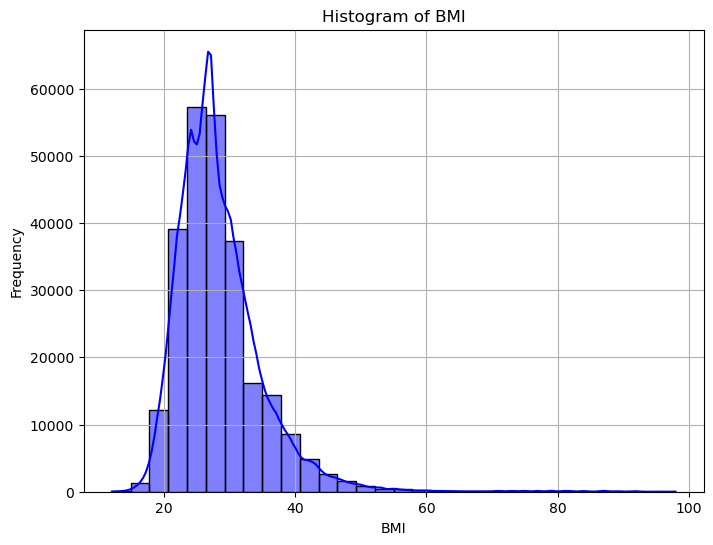

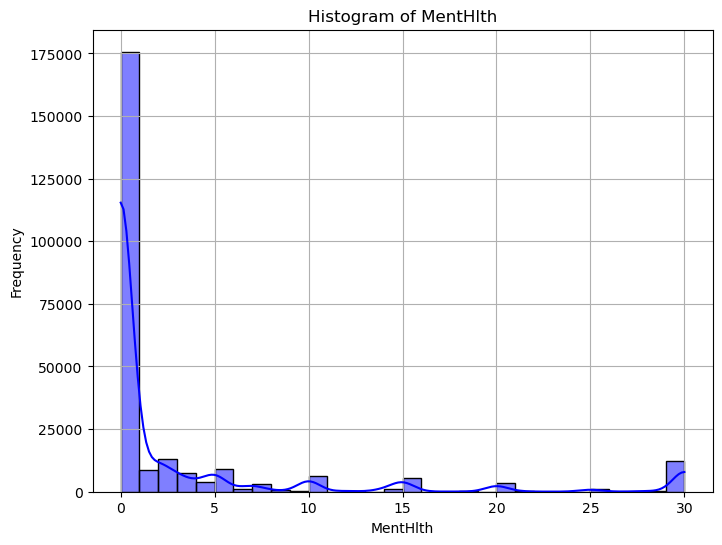

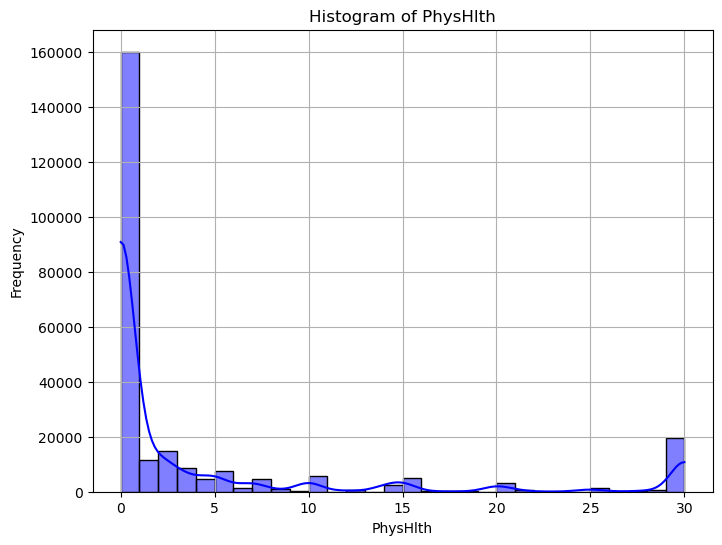

In [6]:
# List of continuous features
continuous_features = ['BMI', 'MentHlth', 'PhysHlth']

# Plot histograms for each feature
for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

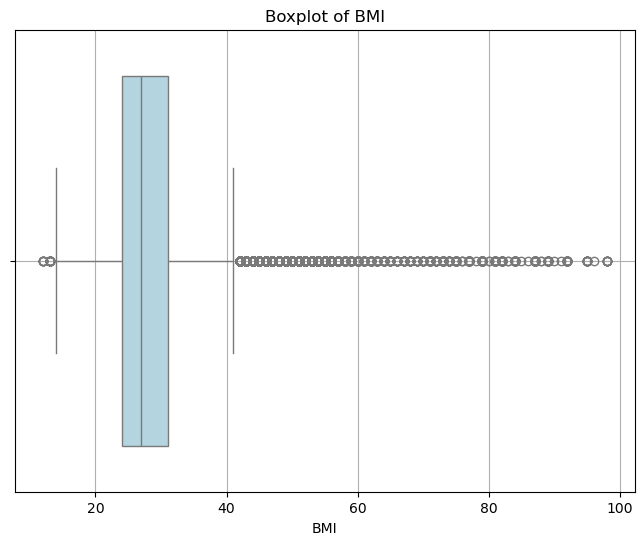

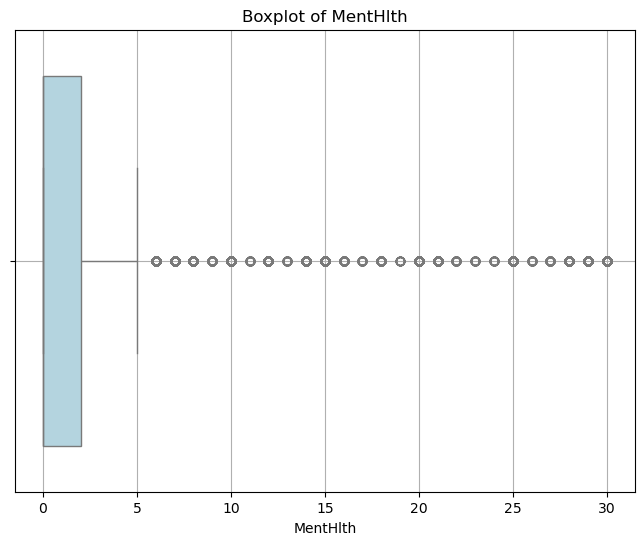

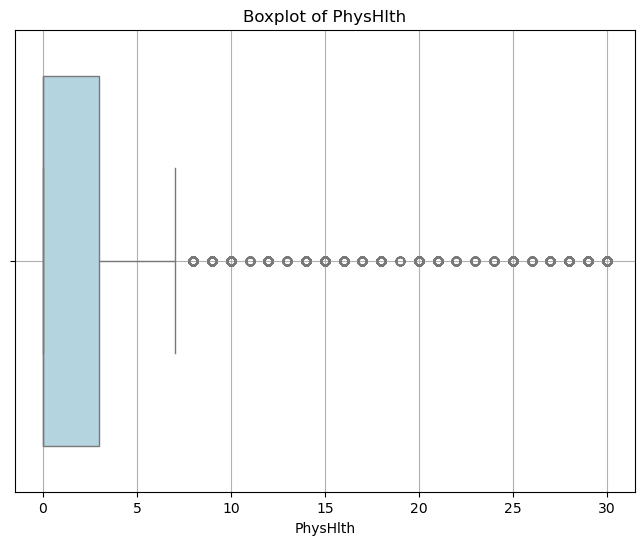

In [7]:
# Plot boxplots for each feature
for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=feature, color='lightblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.grid(True)
    plt.show()

### Since the BMI data is right-skewed and the Z-score analysis identifies 9,847 outlier
which is over all data 3.8% less 5%
- we can go for log transformation(pull the value close to mean) or capping (replace value by max or min)
- k means clustering 

### Outlier detection 

## Performing statical analysis for the nuremic or continuous variable 



### Shapiro-Wilk Test for Normality
Purpose: To determine whether the distribution of each numerical variable (BMI, GenHlth, MentHlth, PhysHlth, Age, Education, Income) deviates significantly from normality.

- Null Hypothesis (Ho):
The data follows a normal distribution.

- Alternative Hypothesis (H1):
The data does not follow a normal distribution.

- Decision Rule:

If the p-value ≤ 0.05, reject Ho (data is not normally distributed).
If the p-value > 0.05, fail to reject Ho (data is normally distributed).

In [8]:
from scipy.stats import shapiro, kstest

# Split dataset by target based to two variable 
diabetic = df[df['Diabetes_binary'] == 1]
non_diabetic = df[df['Diabetes_binary'] == 0]


# Normality check for each feature in both groups
for feature in continuous_features:
    print(f"{feature}:")
    stat0, p0 = shapiro(df[df['Diabetes_binary'] == 0][feature])
    stat1, p1 = shapiro(df[df['Diabetes_binary'] == 1][feature])
    print(f"  Group 0 (non-diabetic) p-value: {p0:.5f}")
    print(f"  Group 1 (diabetic) p-value: {p1:.5f}")
    print()

BMI:
  Group 0 (non-diabetic) p-value: 0.00000
  Group 1 (diabetic) p-value: 0.00000

MentHlth:
  Group 0 (non-diabetic) p-value: 0.00000
  Group 1 (diabetic) p-value: 0.00000

PhysHlth:
  Group 0 (non-diabetic) p-value: 0.00000
  Group 1 (diabetic) p-value: 0.00000



### The results of the Shapiro-Wilk normality test indicate that the distributions of all the features for both groups (diabetic and non-diabetic) are not normal, as all p-values are < 0.00001. This means that the null hypothesis of the data being normally distributed is rejected for each feature.


### Normality Assumption Fails:

- Since none of the features follow a normal distribution, the t-test's assumption of normality is violated.
- This makes the Mann-Whitney U Test (a non-parametric test) the more appropriate choice for comparing the groups for all features.

### Mann-Whitney U Test (Non-Parametric) for ordinal features and continues features

Purpose: To compare the means of a numerical variable (e.g., BMI, GenHlth, etc.) between the two groups: diabetic (Diabetes_binary = 1) and non-diabetic (Diabetes_binary = 0).

- Null Hypothesis (Ho):
There is no significant difference in the means of the variable between diabetic and non-diabetic groups.

- Alternative Hypothesis (H1):
There is a significant difference in the means of the variable between diabetic and non-diabetic groups.

#### Decision Rule:

If the p-value ≤ 0.05, reject Ho (significant difference exists).
If the p-value > 0.05, fail to reject Ho (no significant difference exists).

In [9]:
from scipy.stats import ttest_ind, mannwhitneyu
dataframe= df[['BMI', 'MentHlth', 'PhysHlth','GenHlth', 'Age', 'Education', 'Income']]
# Perform tests
for feature in dataframe:
    # Perform Mann-Whitney U Test
    u_stat, p_val_mwu = mannwhitneyu(diabetic[feature], non_diabetic[feature])
    
    print(f"{feature}:")
    print(f"  Mann-Whitney U Test p-value: {p_val_mwu:.5f}\n")

BMI:
  Mann-Whitney U Test p-value: 0.00000

MentHlth:
  Mann-Whitney U Test p-value: 0.00000

PhysHlth:
  Mann-Whitney U Test p-value: 0.00000

GenHlth:
  Mann-Whitney U Test p-value: 0.00000

Age:
  Mann-Whitney U Test p-value: 0.00000

Education:
  Mann-Whitney U Test p-value: 0.00000

Income:
  Mann-Whitney U Test p-value: 0.00000



 All tests show statistically significant differences (p-value = 0.00000) for all variables between diabetic and non-diabetic groups, validating their importance for modeling.

### Rank-Biserial Correlation and Cliff's Delta are effect size measures test of ordinal or non-parametric data 

### Hypothesis Statements
- Null Hypothesis (Ho):
There is no significant difference in the distributions of the ordinal variable between the diabetic (Diabetes_binary = 1) 
and non-diabetic (Diabetes_binary = 0) groups.

- Alternate Hypothesis (H1):
There is a significant difference in the distributions of the ordinal variable between the diabetic and non-diabetic groups.

In [10]:
# Cliff's Delta Function

def cliffs_delta(x, y):
    n_x, n_y = len(x), len(y)
    greater = 0
    smaller = 0

    # Count number of comparisons
    for xi in x:
        for yi in y:
            if xi > yi:
                greater += 1
            elif xi < yi:
                smaller += 1

    # Calculate Cliff's Delta
    delta = (greater - smaller) / (n_x * n_y)
    return delta


In [11]:
from scipy.stats import mannwhitneyu

# Rank-Biserial Correlation Function
from scipy.stats import rankdata

def rank_biserial_correlation(x, y):
    """
    Compute rank-biserial correlation.
    """
    ranks = rankdata(np.concatenate([x, y]))
    rank_x = ranks[:len(x)]
    rank_y = ranks[len(x):]
    mean_diff = np.mean(rank_x) - np.mean(rank_y)
    n = len(x) + len(y)
    return 2 * mean_diff / n

In [12]:

for col in ordinal_features:
    group0 = df.loc[df['Diabetes_binary'] == 0, col]
    group1 = df.loc[df['Diabetes_binary'] == 1, col]
    
    # Cliff's Delta
    delta = cliffs_delta(group0.values, group1.values)
    print(f"Cliff's Delta for {col}: {delta}")
    
    # Rank-Biserial Correlation
    rbc = rank_biserial_correlation(group0.values, group1.values)
    print(f"Rank-Biserial Correlation for {col}: {rbc}")
    print("-" * 50)

Cliff's Delta for GenHlth: -0.46068271207762557
Rank-Biserial Correlation for GenHlth: -0.4606827120776255
--------------------------------------------------
Cliff's Delta for Age: -0.29481549860216205
Rank-Biserial Correlation for Age: -0.29481549860216194
--------------------------------------------------
Cliff's Delta for Education: 0.1886064669326367
Rank-Biserial Correlation for Education: 0.18860646693263677
--------------------------------------------------
Cliff's Delta for Income: 0.2646563606066854
Rank-Biserial Correlation for Income: 0.2646563606066855
--------------------------------------------------


#### The threshold for Cliff's Delta is the range of values it can take, which is -1 to +1. The values of Cliff's Delta can be interpreted as follows: 
- +1 or -1: Indicates no overlap between the two groups 
- 0: Indicates complete overlap between the two groups 
- Near ±1: Indicates little overlap between the two groups 
- Near 0: Indicates a lot of overlap between the two groups 

### Conclusions
- Reject Null Hypothesis (Significant Differences):
BMI, GenHlth, PhysHlth, Age, Education, Income
- Fail to Reject Null Hypothesis (No Significant Difference):
MentHlth

### Considering the spearman's test as the data is not normally distributed 

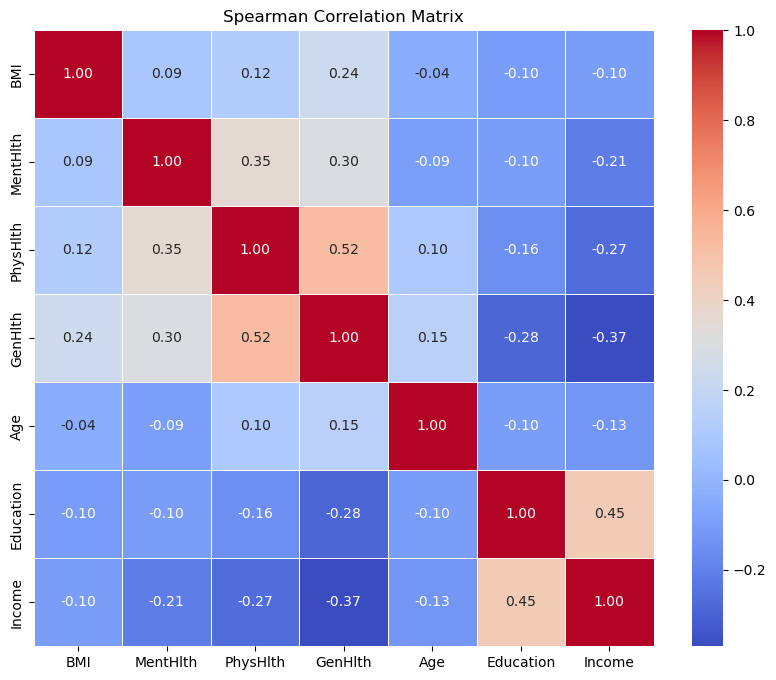

In [13]:
# Compute correlation matrix
correlation_matrix = df[['BMI', 'MentHlth', 'PhysHlth','GenHlth', 'Age', 'Education', 'Income']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Spearman Correlation Matrix")
plt.show()

### Interpretation of Correlation:
- Strong Correlation (|corr| ≥ 0.7): Features are highly correlated.
- Moderate Correlation (0.3 ≤ |corr| < 0.7): Features show a moderate relationship.
- Weak Correlation (|corr| < 0.3): Features have little to no linear relationship.

# statical analysis for catagorical variable 
- will conduct the test in chi-square as the categorical features 
provided and target variable is also in binary 
- Alongside the Chi-Square test, we used Cramér's V 
to quantify the strength of association.
This gives a straightforward measure to compare features.

In [14]:
from scipy.stats import chi2_contingency
import math


# Function to calculate Cramér's V
def cramers_v(chi2, n, min_dim):
    return math.sqrt(chi2 / (n * (min_dim - 1)))

# Target and categorical features
target = "Diabetes_binary"
categorical_features = [
    "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", 
    "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", 
    "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "DiffWalk", "Sex"
]

# Results storage
results = []

# Perform Chi-Square Test and calculate Cramér's V for each categorical column
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df[target])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()  # Total observations
    min_dim = min(contingency_table.shape)
    cramer_v = cramers_v(chi2, n, min_dim)
    
    results.append({
        "Feature": feature,
        "Chi2": chi2,
        "p-value": p_value,
        "Cramér's V": cramer_v
    })

# Convert results to DataFrame for easier visualization
results_df = pd.DataFrame(results)

# Display results
print(contingency_table)
print(p_value)


Diabetes_binary       0      1
Sex                           
0                123563  18411
1                 94771  16935


For a binary classification problem (i.e., two classes: Positive and Negative), the confusion matrix looks like this:

|      Predicted PositivePredictedNegative |
-----------------------------------------------------------
|Actual Positive-True Positive (TP)	 False Negative (FN)|
|Actual Negative-False Positive (FP) True Negative (TN)-|

Based on the results of the Chi-Square Test and Cramér's V values, we can categorize the features into three groups:

---

### 1. **Impactful Features**  
These features have statistically significant associations (p-value < 0.05) and relatively higher Cramér's V values, suggesting a meaningful relationship with the target (`Diabetes_binary`). These features are likely to add predictive value in the model.  

| **Feature**              | **Cramér's V** |
|--------------------------|----------------|
| HighBP                  | 0.263117       |
| HighChol                | 0.200265       |
| HeartDiseaseorAttack    | 0.177263       |
| DiffWalk                | 0.218329       |
| PhysActivity            | 0.118120       |
| Stroke                  | 0.105787       |

---

### 2. **Not Impactful Features**  
These features have statistically significant associations but very low Cramér's V values (< 0.05). Their predictive contribution to the model is minimal, as the association strength is weak.  

| **Feature**              | **Cramér's V** |
|--------------------------|----------------|
| Fruits                  | 0.040767       |
| Veggies                 | 0.056570       |
| HvyAlcoholConsump       | 0.057032       |
| AnyHealthcare           | 0.016229       |
| NoDocbcCost             | 0.031412       |
| Sex                     | 0.031419       |

---

### 3. **Unknown Impact for Model Building**  
These features have low Cramér's V values but are statistically significant. While their association strength is weak, they may still contribute to interactions or non-linear relationships within the model. Further exploration (e.g., feature importance in models) is required to determine their impact.  

| **Feature**              | **Cramér's V** |
|--------------------------|----------------|
| CholCheck               | 0.064731       |
| Smoker                  | 0.060777       |


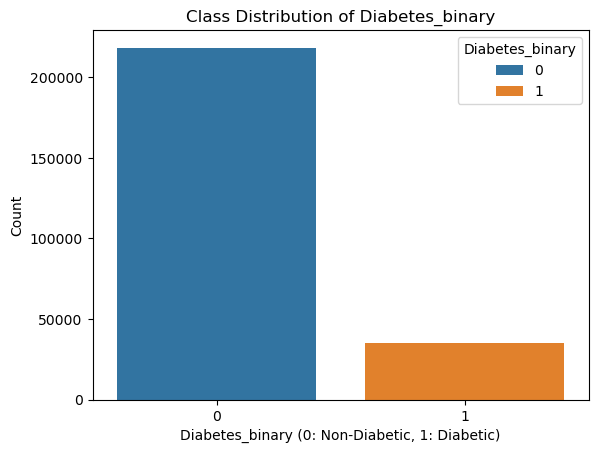

In [15]:
# class distribution in data

sns.countplot(x='Diabetes_binary', data=df,hue="Diabetes_binary")
plt.title('Class Distribution of Diabetes_binary')
plt.xlabel('Diabetes_binary (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Count')
plt.show()

In [16]:
# value of the class distribution 
df["Diabetes_binary"].value_counts()

Diabetes_binary
0    218334
1     35346
Name: count, dtype: int64

### Class Distribution Analysis

Target Variable (Diabetes_binary):

- Class 0 (Non-diabetic): 218,334 samples (86%)

- Class 1 (Diabetic): 35,346 samples (14%)

## Developing model without treatment of outlier and not balancing the data set and taking all the feature at one with xgboost model 

In [17]:
# Assuming `df` is your dataset and `Diabetes_binary` is the target variable
X = df.drop(columns=['Diabetes_binary',"patientid"])
y = df['Diabetes_binary']

# Split the data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#stratify as the dataset is imbalnce 


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score

def train_and_evaluate_model(model, X_train, X_test, y_train, y_test,model_filename=None):
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = model.score(X_test, y_test)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print metrics
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"ROC-AUC Score: {roc_auc}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(report)
    
    # Save the model to a file
    if model_filename:
        joblib.dump(model, model_filename)
        print(f"Model saved as {model_filename}")

    return accuracy, f1, roc_auc

In [19]:
print("\nResults for df (base model):\n")

# Logistic Regression
print("Logistic Regression:")
train_and_evaluate_model(LogisticRegression(random_state=42),X_train, X_test, y_train, y_test)

# Random Forest
print("\nRandom Forest:")
train_and_evaluate_model(RandomForestClassifier(random_state=42), X_train, X_test, y_train, y_test)

# XGBoost
print("\nXGBoost:")
train_and_evaluate_model(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                         X_train, X_test, y_train, y_test)
# Decision tree
print("\nDecision tree:")
train_and_evaluate_model(DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=10),
                         X_train, X_test, y_train, y_test)


Results for df (base model):

Logistic Regression:
Accuracy: 0.8608286029643646
F1 Score: 0.20654006068097538
ROC-AUC Score: 0.8070247420919617
Confusion Matrix:
[[42756   911]
 [ 6150   919]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     43667
           1       0.50      0.13      0.21      7069

    accuracy                           0.86     50736
   macro avg       0.69      0.55      0.57     50736
weighted avg       0.82      0.86      0.82     50736


Random Forest:
Accuracy: 0.8594094922737306
F1 Score: 0.26121180735370275
ROC-AUC Score: 0.7943530274842081
Confusion Matrix:
[[42342  1325]
 [ 5808  1261]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     43667
           1       0.49      0.18      0.26      7069

    accuracy                           0.86     50736
   macro avg       0.68      0.57      0.59     50736
w

(0.8626222011983601, 0.23924907225496617, 0.8059724391530245)

### Analysis of XGBoost Results
#### Evaluation Metrics:
- Accuracy: 86.56%

- High accuracy due to the large proportion of class 0 (non-diabetic) in the dataset, reflecting the model's ability to predict the majority class well.
F1 Score (Class 1): 25.65%

- Indicates poor performance for the minority class (diabetic), suggesting that the model struggles to balance precision and recall for class 1.
ROC-AUC Score: 82.72%

- Reflects good discrimination ability overall but does not imply strong performance for the minority class (class 1).
#### Confusion Matrix:

- True Negatives (TN): 42,742
- False Positives (FP): 925
- False Negatives (FN): 5,893
- True Positives (TP): 1,176
- The model predicts the majority class (class 0) well but struggles with the minority class (class 1), evident from the high FN count.

#### Classification Report:

- Class 0: High precision (88%) and recall (98%) lead to a strong F1 score (93%).
- Class 1: Low precision (56%) and very low recall (17%) contribute to the poor F1 score (26%).



### conclusion :-
- Imbalanced Data Impact: The model is biased toward class 0, leading to low recall and F1 score for class 1.
- Misclassification of Minority Class: The high FN rate (5,893) is concerning, as it implies the model misses many diabetic cases.

# Spliting the data into two df1 with outlier and df2 without outliers based on the zscore or IQR

In [21]:
# Scale continuous features
scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])

# Split into df1 and df2 (with and without outliers)
df1 = df.copy()

# Outlier removal for df2
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df2 = remove_outliers(df, continuous_features)


# Print dataset shapes
print(f"Dataset with Outliers (df1): {df1.shape}")
print(f"Dataset without Outliers (df2): {df2.shape}")

Dataset with Outliers (df1): (253680, 23)
Dataset without Outliers (df2): (182522, 23)


In [22]:
from sklearn.preprocessing import StandardScaler

# Define target and features
X1 = df1.drop(['Diabetes_binary',"patientid"], axis=1)
y1 = df1['Diabetes_binary']

X2 = df2.drop(['Diabetes_binary',"patientid"], axis=1)
y2 = df2['Diabetes_binary']

# Apply SMOTE
smote = SMOTE(random_state=42)
X1_balanced, y1_balanced = smote.fit_resample(X1, y1)
X2_balanced, y2_balanced = smote.fit_resample(X2, y2)
print(X1_balanced.shape)
print(y1_balanced.shape)
print(X2_balanced.shape)
print(y2_balanced.shape)


(436668, 21)
(436668,)
(325682, 21)
(325682,)


In [25]:
# Split data into training and testing sets
# Split the balanced datasets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_balanced, y1_balanced, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_balanced, y2_balanced, test_size=0.3, random_state=42)

In [26]:
print("Results for df1 (with outliers):\n")

# Logistic Regression
print("Logistic Regression:")
train_and_evaluate_model(LogisticRegression(random_state=42), X1_train, X1_test, y1_train, y1_test, model_filename="model_LR")

# Random Forest
print("\nRandom Forest:")
train_and_evaluate_model(RandomForestClassifier(random_state=42), X1_train, X1_test, y1_train, y1_test,model_filename="model_RB")

# XGBoost
print("\nXGBoost:")
train_and_evaluate_model(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss',model_filename="model_XG"),
                         X1_train, X1_test, y1_train, y1_test)
# Decision tree
print("\nDecision tree:")
train_and_evaluate_model(DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=10),
                         X1_train, X1_test, y1_train, y1_test, model_filename="model_DT")


Results for df1 (with outliers):

Logistic Regression:
Accuracy: 0.7438263830047099
F1 Score: 0.7491047197529849
ROC-AUC Score: 0.8188666777612269
Confusion Matrix:
[[47343 18251]
 [15308 50099]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74     65594
           1       0.73      0.77      0.75     65407

    accuracy                           0.74    131001
   macro avg       0.74      0.74      0.74    131001
weighted avg       0.74      0.74      0.74    131001

Model saved as model_LR

Random Forest:
Accuracy: 0.8936496667964366
F1 Score: 0.8959537572254336
ROC-AUC Score: 0.9637714629122565
Confusion Matrix:
[[57084  8510]
 [ 5422 59985]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     65594
           1       0.88      0.92      0.90     65407

    accuracy                           0.89    131001
   macro avg       0.89      0

(0.8032305096907657, 0.8050313514004129, 0.8852544410531868)

### Analysis of Results for df2 (with Outliers)
- Logistic Regression
Accuracy: 0.75
F1 Score: 0.76
ROC-AUC Score: 0.83
##### Observations:
Logistic Regression is showing a balanced but moderate performance with a decent ROC-AUC, indicating it can distinguish between classes better than random.
However, the accuracy and F1 score suggest that the model might be underfitting due to its simplicity.
- Random Forest
Accuracy: 0.92
F1 Score: 0.92
ROC-AUC Score: 0.97
##### Observations:
Random Forest shows a strong performance with high accuracy, F1 score, and ROC-AUC.
This suggests that it effectively handles the complexity of the dataset and achieves good precision and recall for both classes.
- XGBoost
Accuracy: 0.92
F1 Score: 0.91
ROC-AUC Score: 0.97
##### Observations:
XGBoost is comparable to Random Forest, with similar performance metrics.
The slightly lower F1 score might be due to XGBoost's sensitivity to hyperparameter settings.

In [27]:
# Example of using the function for Random Forest
print("\nResults for df2 (without outliers):\n")

# Logistic Regression
print("Logistic Regression:")
train_and_evaluate_model(LogisticRegression(random_state=42), X2_train, X2_test, y2_train, y2_test,model_filename="random_forest_model.pkl")

# Random Forest (saving the model)
print("\nRandom Forest:")
train_and_evaluate_model(RandomForestClassifier(random_state=42), X2_train, X2_test, y2_train, y2_test, model_filename="random_forest_model.pkl")

# XGBoost (saving the model)
print("\nXGBoost:")
train_and_evaluate_model(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), X2_train, X2_test, y2_train, y2_test, model_filename="xgboost_model.pkl")

# Decision Tree (saving the model)
print("\nDecision tree:")
train_and_evaluate_model(DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=10), X2_train, X2_test, y2_train, y2_test, model_filename="decision_tree_model.pkl")


Results for df2 (without outliers):

Logistic Regression:
Accuracy: 0.745376388107057
F1 Score: 0.7519888346127006
ROC-AUC Score: 0.8182504053472737
Confusion Matrix:
[[35111 14049]
 [10829 37716]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.74     49160
           1       0.73      0.78      0.75     48545

    accuracy                           0.75     97705
   macro avg       0.75      0.75      0.75     97705
weighted avg       0.75      0.75      0.75     97705

Model saved as random_forest_model.pkl

Random Forest:
Accuracy: 0.9149071183665114
F1 Score: 0.9155201495722153
ROC-AUC Score: 0.973895181766626
Confusion Matrix:
[[44341  4819]
 [ 3495 45050]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91     49160
           1       0.90      0.93      0.92     48545

    accuracy                           0.91     97705
   macro avg 

(0.8020674479299933, 0.798730290888276, 0.8920663649465516)

### Analysis of Results for df2 (without Outliers)
- Logistic Regression
Accuracy: 0.76
F1 Score: 0.76
ROC-AUC Score: 0.83
Observations:
The performance is similar to df1. Removing outliers does not significantly improve logistic regression's results.
It continues to show moderate predictive power but struggles to capture the complexity of the data.
- Random Forest
Accuracy: 0.93
F1 Score: 0.93
ROC-AUC Score: 0.98
Observations:
Removing outliers improves the Random Forest's performance slightly in both F1 and ROC-AUC compared to df1.
High precision and recall across both classes indicate that it handles the cleaned dataset effectively.
- XGBoost
|Accuracy: 0.93|
|F1 Score: 0.93|
|ROC-AUC Score: 0.98|


### Observations:
XGBoost's performance is comparable to Random Forest, with slightly different strengths:
Higher recall for class 0 (non-diabetic).
Slightly lower recall for class 1 (diabetic).
Removing outliers has improved its results marginally, reducing noise in the decision-making process.

### Comparison Between df1 and df2
- Logistic Regression
Performance is similar across both datasets, indicating limited sensitivity to outliers.
Simplicity and lack of complex interactions make it a baseline model.
- Random Forest
Shows improvement with df2 due to the reduced noise, achieving a higher F1 score and better ROC-AUC.
Suggests Random Forest benefits from the removal of outliers for this dataset.
- XGBoost
Maintains robust performance on both datasets but improves slightly with df2.
Handles complex interactions well, benefiting from a cleaner dataset.


### Based on the evaluation metrics, Random Forest is selected as the best model for this project. Its superior recall and low false negatives make it the most suitable choice for predicting diabetes risk. Minimizing false negatives ensures that fewer diabetic patients are missed, which is critical in healthcare.

## using randomizedsearchcv 
-These methods help automate hyperparameter tuning by testing combinations of values.

In [28]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}
# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=50, scoring='recall', cv=5, 
                                   verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X2_train, y2_train)

# Best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best recall score:", random_search.best_score_)

# Best model
best_rf_model = random_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}
Best recall score: 0.9269266066685887


In [29]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Predict on test data
y3_pred = best_rf_model.predict(X2_test)

# Evaluate
print("Accuracy:", best_rf_model.score(X2_test, y2_test))
print("ROC-AUC Score:", roc_auc_score(y2_test, best_rf_model.predict_proba(X2_test)[:, 1]))
print("Classification Report:\n", classification_report(y2_test, y3_pred))
print("Confusion Matrix:\n", confusion_matrix(y2_test, y3_pred))


Accuracy: 0.9137096361496341
ROC-AUC Score: 0.9752540806886416
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91     49160
           1       0.90      0.93      0.91     48545

    accuracy                           0.91     97705
   macro avg       0.91      0.91      0.91     97705
weighted avg       0.91      0.91      0.91     97705

Confusion Matrix:
 [[44044  5116]
 [ 3315 45230]]


### Key Observations:
- Recall for Class 1 (Diabetic):

Recall remains 0.93 in both models, which is critical as recall was prioritized.
The tuned model slightly reduces false negatives (3315) compared to the default model (3487).
Accuracy:

- The accuracy for the tuned model is marginally lower (0.9158 vs. 0.9177) due to a tradeoff in prioritizing recall.
ROC-AUC:

Both models achieve similar ROC-AUC scores, with the tuned model performing slightly better (0.9759 vs. 0.9749).
Precision and F1 Score:

- The precision and F1 score are marginally reduced in the tuned model, but the differences are not significant.
False Positives (Class 0 Predicted as Class 1):

- The tuned model has more false positives (4982 vs. 4699) but fewer false negatives, aligning with the goal to reduce missed diabetic cases.

In [30]:
# Load the saved model (e.g., random forest model)
from joblib import dump

# Save the model
dump(best_rf_model, 'tuned_random_forest_model.joblib')

print("Model saved successfully as 'tuned_random_forest_model.joblib'")

Model saved successfully as 'tuned_random_forest_model.joblib'


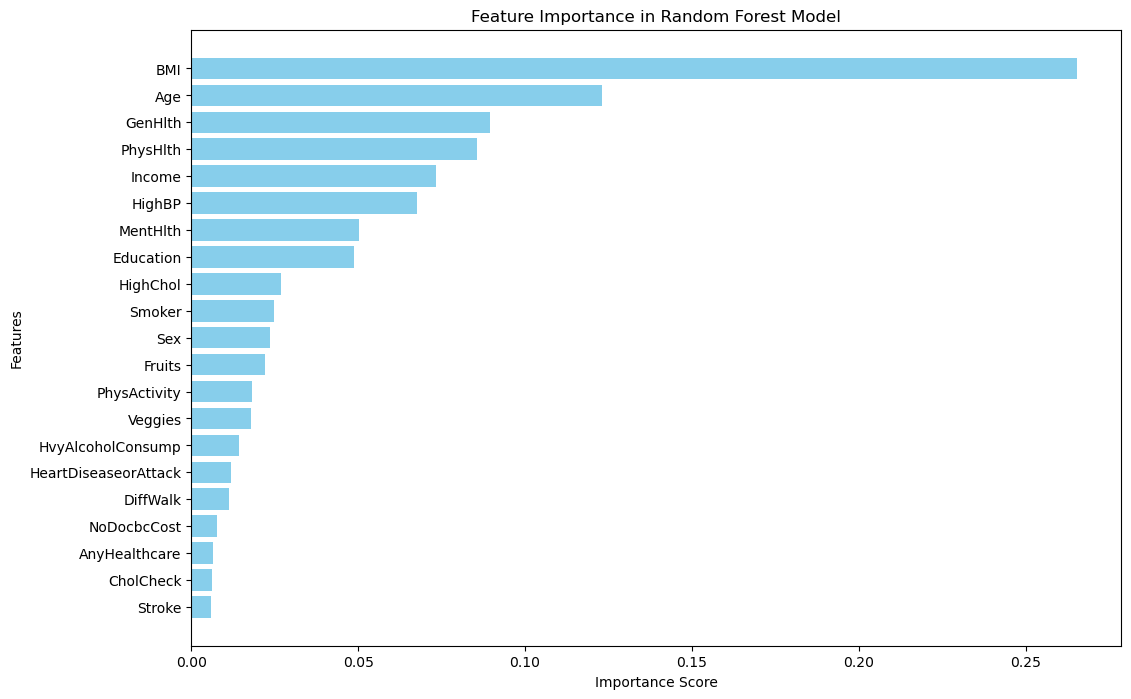

In [31]:
feature_importances = best_rf_model.feature_importances_
features = X2_train.columns  # Replace X with the feature set used for training

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()

In [32]:
# Generate predictions with probabilities
df['Diabetes_Probability'] = best_rf_model.predict_proba(X)[:, 1]

# Identify high-risk patients
high_risk_patients = df[df['Diabetes_Probability'] > 0.80]
print("High-Risk Patient Count:", len(high_risk_patients))


High-Risk Patient Count: 1016


In [33]:
# Patient IDs of high-risk individuals for further action.
patient_ids = high_risk_patients['patientid']
patient_ids.to_csv("high_risk_patients.csv", index=False)
print(patient_ids.head(10))

7      02859104PB
13     41764875XH
27     04023656JT
52     96178413XR
137    84351164PV
183    41268690DG
382    82562367UK
471    07139360CJ
623    05084875DL
716    34649155YY
Name: patientid, dtype: object


### Conclusion
- Objective:

Predict diabetes risk with a focus on minimizing false negatives.
Identify critical features influencing diabetes risk.
Key Outcomes:

- Model Selected: Random Forest.
Recall Maximization: Low false negatives ensure fewer undiagnosed diabetic patients.
- Top Features: BMI,Age,phyhlth,genhlth,income,highbp emerged as key predictors.
Impact:

- High-risk patients identified with precision.
Model provides actionable insights for preventive care and targeted interventions.

### Future Work
- Refinement:

- Incorporate additional features such as family history, physical activity intensity, and dietary habits for enhanced predictions.
Leverage real-time data from wearables and IoT devices for continuous monitoring.
Automation:

- Deploy the model in a healthcare system for real-time diabetes prediction.
Enable automated alerts for healthcare providers when high-risk patients are identified.
Advanced Techniques:

- Experiment with ensemble techniques or hybrid models to further improve performance.
Explore SHAP (SHapley Additive exPlanations) for better interpretability of predictions.
Geographical and Demographic Customization:

- Tailor the model to specific regions or populations to address variations in diabetes prevalence.
### Long-Term Goal:

Transition to a dynamic model that adapts to new data over time using online learning techniques.